### Image Classification
This notebook is an attempt to classify image as either displaying vehicles stopped in the crosswalk or not.  This is not a promising technique for this application, given that each scene can more accurately be described as an interaction of multiple objects that should each be identified, rather than trying to simply classify the entire scene without first identifying the components.  There is too much variance between different scenes to make this a simple task, but it is worth trying to see what such an attempt would look like.

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from keras.preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
from keras_preprocessing.image import array_to_img

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils

from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf
config = tf.compat.v1.ConfigProto(gpu_options = 
                         tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.8)
# device_count = {'GPU': 1}
)
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(session)

## Get images

In [3]:
img_path = '../data/img/'
vio_path = '../data/'

In [4]:
os.listdir('../WebCamT/')

['164',
 '166',
 '170',
 '173',
 '181',
 '253',
 '398',
 '403',
 '410',
 '495',
 '511',
 '551',
 '572',
 '691',
 '846',
 '928',
 'Annotation Instructions.pdf',
 'bigbus',
 'Test164.vott',
 'train_test_separation']

In [5]:
# create a list of all the jpgs
img_list = [file_name for file_name in os.listdir(img_path) if file_name.endswith('.jpg')]       

In [6]:
img_array = []

In [7]:
# Loads all images in img directory and creates an array
for i in range(len(img_list)):
    img = load_img(img_path+img_list[i])
    each_img_array = img_to_array(img)
    img_array.append(each_img_array)

In [8]:
img_array = np.array(img_array)

In [9]:
input_shape = img_array.shape
input_shape

(500, 240, 352, 3)

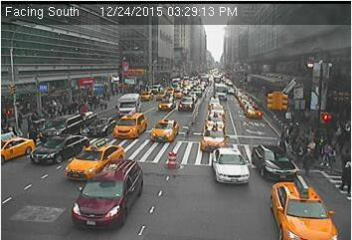

In [10]:
array_to_img(img_array[5])

In [11]:
img_array /= 255

## Get violations

In [12]:
vio = pd.read_csv(vio_path+'xwalk.csv')

In [13]:
vio.sum() / len(vio)

violations    0.256
dtype: float64

### Preprocessing

In [14]:
X_train, X_test, y_train, y_test = train_test_split(img_array, vio)

### Make a CNN

In [15]:
model = Sequential()
model.add(Conv2D(filters=6,
                 kernel_size=(3, 3),
                 activation = 'relu',
                 input_shape=input_shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 238, 350, 6)       168       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 119, 175, 6)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 117, 173, 16)      880       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 58, 86, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 79808)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                5107776   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1

In [17]:
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [18]:
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=200,
                    verbose=0)

Epoch 1/200
12/12 [==============================] - 1s 60ms/step - loss: 1.3377 - accuracy: 0.5653 - val_loss: 0.6932 - val_accuracy: 0.8000
Epoch 2/200
12/12 [==============================] - 0s 31ms/step - loss: 0.6932 - accuracy: 0.7253 - val_loss: 0.6932 - val_accuracy: 0.8000
Epoch 3/200
12/12 [==============================] - 0s 29ms/step - loss: 0.6932 - accuracy: 0.7253 - val_loss: 0.6932 - val_accuracy: 0.8000
Epoch 4/200
12/12 [==============================] - 0s 30ms/step - loss: 0.6932 - accuracy: 0.7253 - val_loss: 0.6932 - val_accuracy: 0.8000
Epoch 5/200
12/12 [==============================] - 0s 31ms/step - loss: 0.6932 - accuracy: 0.7253 - val_loss: 0.6932 - val_accuracy: 0.8000
Epoch 6/200
12/12 [==============================] - 0s 30ms/step - loss: 0.6932 - accuracy: 0.7253 - val_loss: 0.6932 - val_accuracy: 0.8000
Epoch 7/200
12/12 [==============================] - 0s 31ms/step - loss: 0.6932 - accuracy: 0.7253 - val_loss: 0.6932 - val_accuracy: 0.8000
Epoch 

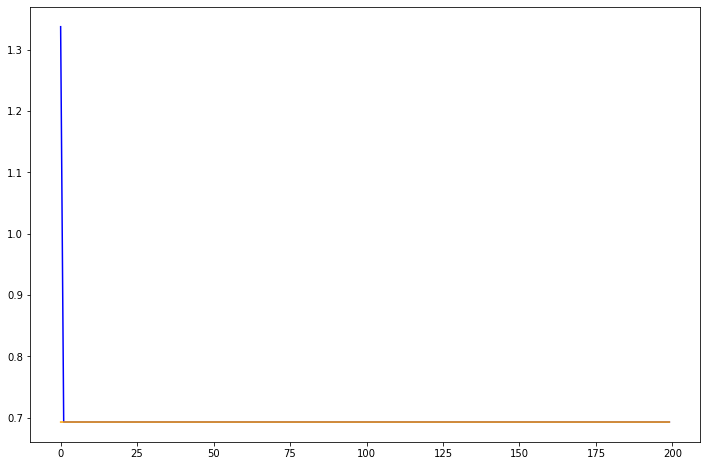

In [19]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
epoch_labels = history.epoch

plt.figure(figsize=(12,8))

plt.plot(train_loss, label='Training Loss', color='blue');
plt.plot(test_loss, label='Testing Loss', color='orange');



In [24]:
# Looks like we are meeting a null hypotheses due to our uneven classes.
1 - y_train.values.mean()

0.7253333333333334

### Conclusions

Adjusting the data for uneven classes and providing more images would make a better attempt, but I do not think image classification is a promising method for the intent of the project.  As such, work has been shifted entirely towards object detection methods.